In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

sys.path.append('/home/tpopova/prj/PB_SCF/08_2D_pore/py_files')
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import config_loader
from out_reader import out_reader, get_profiles_by_y_or_x
from dendrons_pore import dendrons_pore

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


# График сравнения теории и намикса: электростатический потенциал

Параметры

In [2]:
N = 50
Cs = 0.001
S = 150
D = 50
valence = -0.

# Для 2D
L_pore = 100
space = 10
L_wall = 8

# Теория

In [3]:
N, n, theta, _, r_in_dendrons, r_out_dendrons, psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, _ = dendrons_pore(
    Cs = Cs,
    
    #параметры щетки
    alpha = abs(valence),
    S = S,
    
    #параметры поры
    D = D,
    N_opt = N,
    
)

print(N, theta)

50 104.71975511965978


# Namics 2D

In [4]:

# Загрузить конфигурацию
config = config_loader.load_config()

# Обновить параметры
params_to_update = {
    "Cs": Cs,
    "D": D,
    "L_pore": L_pore,
    "L_wall": L_wall,
    "N": N,
    "S": S,
    "chi_solv": 0.5,
    "chi_surf": -0.55,
    "max_val": 0.1,
    "min_val": 0.1,
    "output_dir": "2D_pore_in_files_fig2",
    "range_param": 'Cs',
    "space": space,
    "target_dir": "/home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates",
    "valence": valence,
}

for param, value in params_to_update.items():
    config = config_loader.update_config_param(config, param, value)

# Сохранить обновлённую конфигурацию
config_loader.save_config(config)


INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Обновление параметра Cs на 0.001
INFO:root:Обновление параметра D на 50
INFO:root:Обновление параметра L_pore на 100
INFO:root:Обновление параметра L_wall на 8
INFO:root:Обновление параметра N на 50
INFO:root:Обновление параметра S на 150
INFO:root:Обновление параметра chi_solv на 0.5
INFO:root:Обновление параметра chi_surf на -0.55
INFO:root:Обновление параметра max_val на 0.1
INFO:root:Обновление параметра min_val на 0.1
INFO:root:Обновление параметра output_dir на 2D_pore_in_files_fig2
INFO:root:Обновление параметра range_param на Cs
INFO:root:Обновление параметра space на 10
INFO:root:Обновление параметра target_dir на /home/tpopova/prj/PB_SCF/08_2D_pore/scf_templates
INFO:root:Обновление параметра valence на -0.5
INFO:root:Конфигурация успешно сохранена в /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml


# Расчет

In [5]:
df, x, y, psi, phi_brush, phi_end_brush = out_reader()

INFO:root:Конфигурация успешно загружена из /home/tpopova/prj/PB_SCF/08_2D_pore/py_files/config.yaml
INFO:root:Файл 2D_Cs_0_0010_L100_0_L_wall_8_0_space_10_0_v_-0_50_D_50_N_50_theta_104_72.in успешно создан в 2D_pore_in_files_fig2


Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.412882e+00 |g| = 2.727994e+00 alpha = 1.000000e+00 
hessian scaling: 0.285616
it =  1  E = 1.320804e+00 |g| = 2.622413e+00 alpha = 1.366570e-01 
it =  2  E = 2.516692e+00 |g| = 2.546172e+00 alpha = 3.374330e-02 
it =  3  E = 2.848969e+00 |g| = 2.495430e+00 alpha = 2.399272e-02 
it =  4  E = 3.263637e+00 |g| = 2.461752e+00 alpha = 1.684905e-02 
it =  5  E = 3.756732e+00 |g| = 2.437535e+00 alpha = 1.180789e-02 
it =  6  E = 4.206693e+00 |g| = 2.419435e+00 alpha = 8.795414e-03 
it =  7  E = 4.639497e+00 |g| = 2.405038e+00 alpha = 6.784066e-03 
it =  8  E = 4.994903e+00 |g| = 2.393226e+00 alpha = 5.512181e-03 
it =  9  E = 5.305326e+00 |g| = 2.383136e+00 alpha = 4.616424e-03 
it =  10  E = 5.547338e+00 |g| = 2.374320e+0

# Построение графика

In [6]:
# Доли от центра для y
y_fraction = [0]

# Используем функцию для получения значений по доле
result = get_profiles_by_y_or_x(df, y_fraction, profiles_name='sys_noname_psi', groupby='y', coord='x', use_fraction=True)

<>:9: SyntaxWarning: invalid escape sequence '\ '
<>:9: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipykernel_2908329/3954090205.py:9: SyntaxWarning: invalid escape sequence '\ '
  plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")


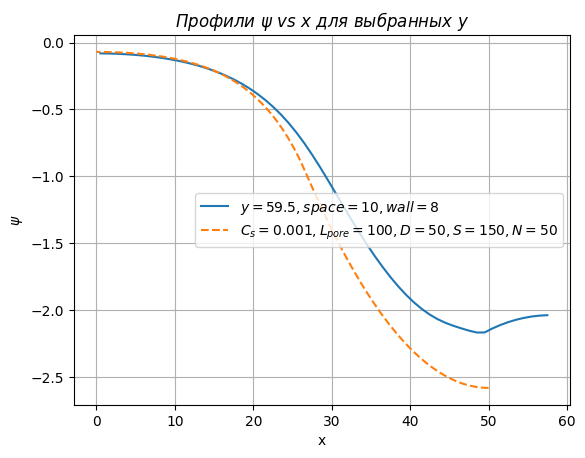

In [7]:
# Построение графиков
for y_val, data in result.items():
    plt.plot(data['x'], data['sys_noname_psi'], label=f"$y = {y_val}, space = {space}, wall = {L_wall}$")
    
plt.plot(np.hstack((r_in_dendrons, r_out_dendrons)), np.hstack((psi_in_dendrons, psi_out_dendrons)), linestyle = '--', label = f'$C_s = {Cs}, L_{{pore}} = {L_pore}, D = {D}, S = {S}, N = {N}$')

plt.xlabel("x")
plt.ylabel("$\\psi$")
plt.title("$Профили \ \\psi \ vs \ x \ для \ выбранных \ y$")
plt.legend()
plt.grid()
plt.show()